In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Flatten, Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly shift images horizontally by up to 20% of width
    height_shift_range=0.2,    # Randomly shift images vertically by up to 20% of height
    shear_range=0.2,           # Apply random shear transformations
    zoom_range=0.2,            # Randomly zoom into images by up to 20%
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill in missing pixels with nearest pixel values
)

# Define ImageDataGenerator for validation data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Set batch size
batch_size = 32

# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (9) - Copy - Copy/Data/train',                 # Directory containing training images
    target_size=(224, 224),    # Resize images to match input size of VGG16
    batch_size=batch_size,     # Batch size
    class_mode='categorical'   # Specify categorical labels
)

# Flow validation images in batches using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (9) - Copy - Copy/Data/test',            # Directory containing validation images
    target_size=(224, 224),    # Resize images to match input size of VGG16
    batch_size=batch_size,     # Batch size
    class_mode='categorical'   # Specify categorical labels
)

Found 1437 images belonging to 3 classes.
Found 404 images belonging to 3 classes.


In [ ]:
# Load the pre-trained ResNet50 model without the top (classification) layers
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers to prevent them from being updated during training
for layer in resnet50_base.layers:
    layer.trainable = False

In [ ]:
# Create a new model with custom classification layers on top of ResNet50
model = Sequential([
    resnet50_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Adjust the number of output classes according to your task
])



In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49278851 (187.98 MB)
Trainable params: 25691139 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# Train the model with early stopping
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # Increased number of epochs for better convergence
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)

Epoch 1/20
44/44 [==============================] - 64s 1s/step - loss: 1.4107 - accuracy: 0.4292 - val_loss: 0.8509 - val_accuracy: 0.6068
Epoch 2/20
44/44 [==============================] - 54s 1s/step - loss: 0.8957 - accuracy: 0.5972 - val_loss: 0.8010 - val_accuracy: 0.6641
Epoch 3/20
44/44 [==============================] - 55s 1s/step - loss: 0.8948 - accuracy: 0.5625 - val_loss: 0.6889 - val_accuracy: 0.7552
Epoch 4/20
44/44 [==============================] - 56s 1s/step - loss: 0.7872 - accuracy: 0.6833 - val_loss: 0.7046 - val_accuracy: 0.6042
Epoch 5/20
44/44 [==============================] - 52s 1s/step - loss: 0.7453 - accuracy: 0.6982 - val_loss: 0.6449 - val_accuracy: 0.6927
Epoch 6/20
44/44 [==============================] - 52s 1s/step - loss: 0.7037 - accuracy: 0.7253 - val_loss: 0.6757 - val_accuracy: 0.6667
Epoch 7/20
44/44 [==============================] - 55s 1s/step - loss: 0.7212 - accuracy: 0.6918 - val_loss: 0.5747 - val_accuracy: 0.7708
Epoch 8/20
44/44 [==

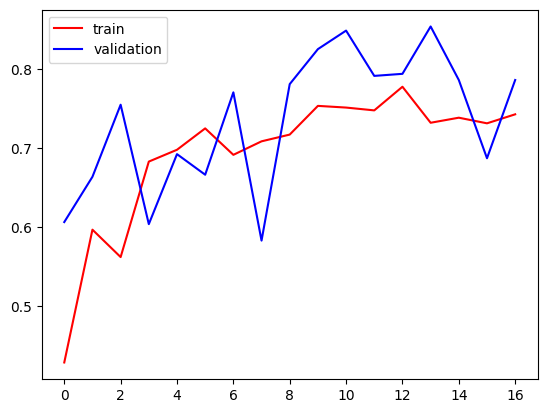

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

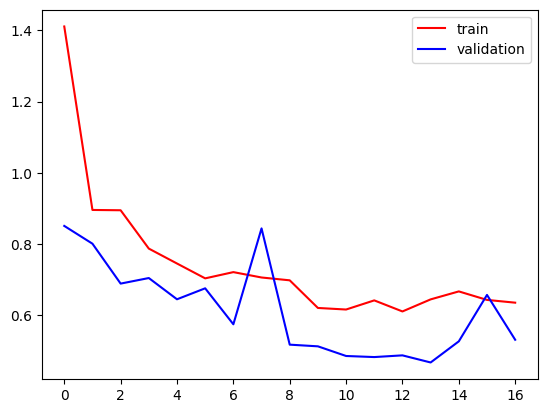

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 12s 966ms/step - loss: 0.5332 - accuracy: 0.7847
Test Loss: 0.5332448482513428
Test Accuracy: 0.7846534848213196
